In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime 

load csv data from local

In [2]:
df = pd.read_csv("..\\data\\retail_sales_dataset.csv")

dataframe

In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# Top 10 expensive price per unit

First we have to look at our reference column and sort it with descending order and filter it out for range of ten. So we can conclude that the top 10 price for item purchased by customer is 500

In [4]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df["Price per Unit"].sort_values(ascending=False)[:10]


280    500
104    500
936    500
136    500
604    500
138    500
486    500
530    500
143    500
696    500
Name: Price per Unit, dtype: int64


# Different tiers of price per unit

As we can see the unique price for each product that customer bought were 500, 300, 50, 30, 25

In [6]:
sorted(df["Price per Unit"].unique(), reverse=True)

[500, 300, 50, 30, 25]

We can observe that the highest customer spending based on item price per unit is 50 because the highest unit of customer purchased which 211

In [7]:
df["Price per Unit"].value_counts()

Price per Unit
50     211
25     210
500    199
300    197
30     183
Name: count, dtype: int64

Famous category of products is clothing that the value count is the highest which is 351 folowed by Electronics 342 and Beauty 307. This show that customer prefer to purchase Cloth compare to Electronics and Beauty product

In [8]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

We can conlude that gender tendency for purchasing product category are quite balanced which Clothing for male (177), Electronics for male (172) and Beauty for female (166)

In [9]:
df[["Product Category","Gender"]].value_counts()

Product Category  Gender
Clothing          Male      177
                  Female    174
Electronics       Male      172
                  Female    170
Beauty            Female    166
                  Male      141
Name: count, dtype: int64

# Total Monthly sales 

From our observation we can simplify that the most highest sales by customer occur at peak is May 2023 and plummetly drop at September 2023 

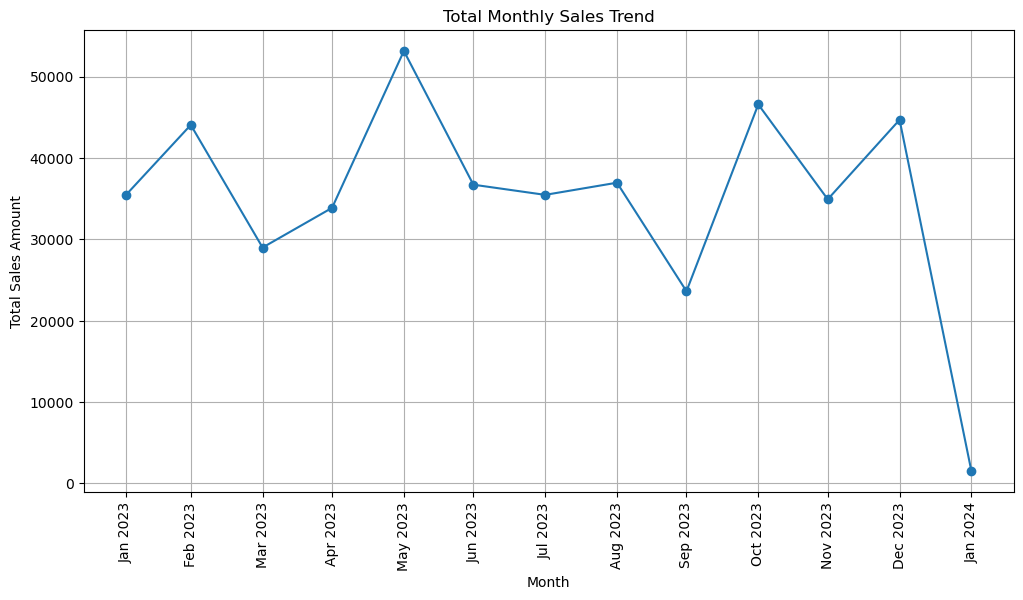

In [40]:
df['Date']=pd.to_datetime(df['Date'])
monthly_sales = df.resample('ME', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Total Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=90)
plt.grid(True)
plt.show()

## Total monthly sales by product category

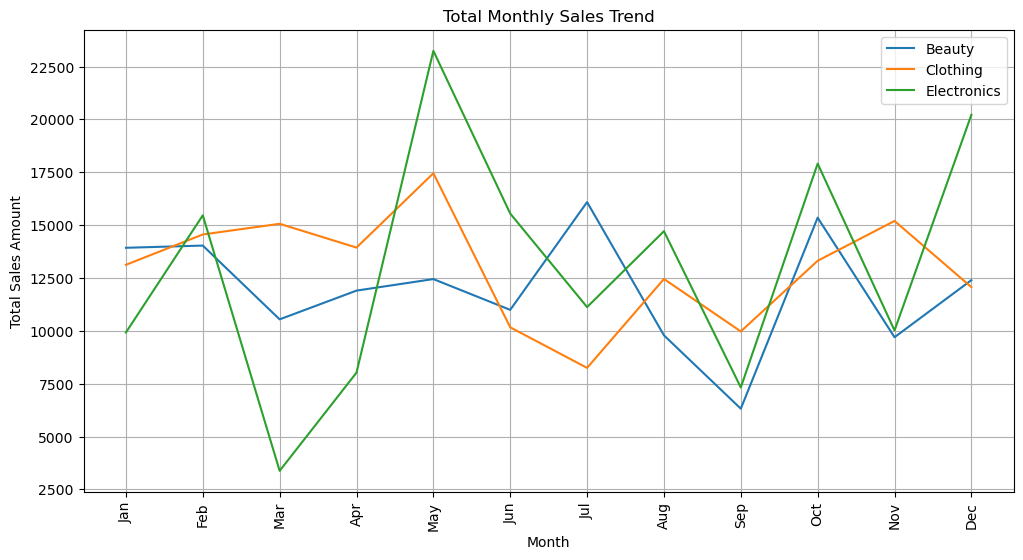

In [42]:
df['Date']=pd.to_datetime(df['Date'])
df['Month'] = pd.DatetimeIndex(df['Date']).month
cm_df = df.groupby(["Product Category","Month"])['Total Amount'].sum().reset_index(name='Total')
pc = list(cm_df['Product Category'].unique())
cm_df = cm_df.pivot(index='Month', columns='Product Category', values='Total').reset_index()
plt.figure(figsize=(12, 6))
plt.plot(cm_df['Month'], cm_df[pc[0]],label=pc[0])
plt.plot(cm_df['Month'], cm_df[pc[1]],label=pc[1])
plt.plot(cm_df['Month'], cm_df[pc[2]],label=pc[2])
plt.title('Total Monthly Sales Trend')
plt.legend(pc)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=cm_df['Month'], labels=[datetime.datetime(2000, month, 1).strftime('%b') for month in cm_df['Month']], rotation=90)
plt.grid(True)
plt.show()

In [31]:
cm_df.reset_index


<bound method DataFrame.reset_index of Product Category  Beauty  Clothing  Electronics
Month                                          
1                  13930     13125         9925
2                  14035     14560        15465
3                  10545     15065         3380
4                  11905     13940         8025
5                  12450     17455        23245
6                  10995     10170        15550
7                  16090      8250        11125
8                   9790     12455        14715
9                   6320      9975         7325
10                 15355     13315        17910
11                  9700     15200        10020
12                 12400     12070        20220>

In [24]:
cm_df.pivot(index='Month', columns='Product Category', values='Total')

Product Category,Beauty,Clothing,Electronics
Month,,,
1,13930,13125,9925
2,14035,14560,15465
3,10545,15065,3380
4,11905,13940,8025
5,12450,17455,23245
6,10995,10170,15550
7,16090,8250,11125
8,9790,12455,14715
9,6320,9975,7325


Check the output for monthly sales

In [13]:
monthly_sales

Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64

In [14]:
monthly_sales.index,

(DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
                '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
                '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
                '2024-01-31'],
               dtype='datetime64[ns]', name='Date', freq='ME'),)

Total Monthly sales by product category that the highest sales of product category is Clothing followed by Electronics and Beauty

In [1]:
# Sales by Product Category
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Product Category', order=df['Product Category'].value_counts().index)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()



NameError: name 'pd' is not defined

# Correlation Analysis

This is to study the correlation between parameter for the output desired. We can see high correlation between price + total amount bought in transaction which is 0.85 .From this we can assume that there is Positive Correlation: As one variable increases, the other also increases.
Strength of Relationships:
Small correlation: 0.10 to 0.29
Medium correlation: 0.30 to 0.49
Large correlation: 0.50 to 1.0
Thus there is large correlation between price and total amount bought in transaction of customer

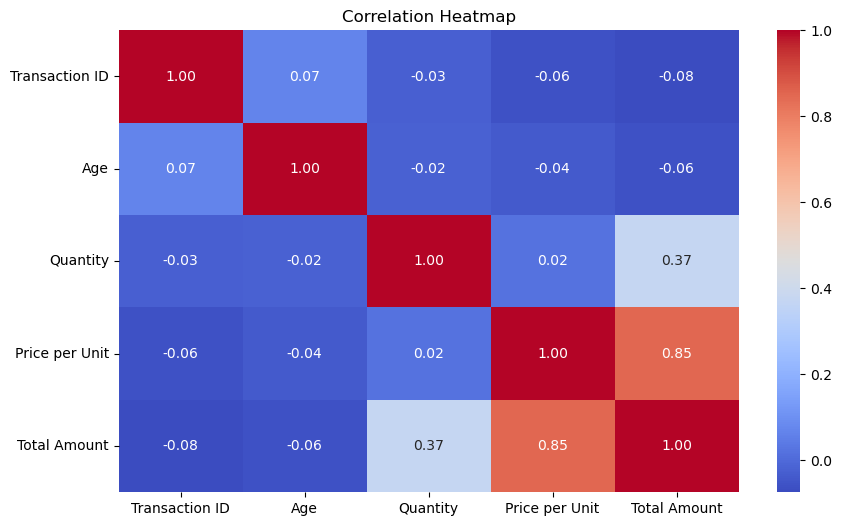

In [16]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()